In [ ]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File paths and Tensorflow
import os
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Random forest model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Keras
from tensorflow import keras
# from tensorflow.keras

In [ ]:
# Read in the liver_clean.csv
liver_df = pd.read_csv("https://raw.githubusercontent.com/amydohlin/project-4-group-2/main/cleaned_csvs/liver_clean.csv")
liver_df

,Unnamed: 0,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,24963,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
9635,24971,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
9636,24972,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
9637,24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


In [ ]:
#drop the "unnamed: 0" uneccesary index column
liver_clean_df=liver_df.drop(["Unnamed: 0"],axis=1)

liver_clean_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
#Check columns
print("Columns in DataFrame:")
print(liver_clean_df.columns.tolist())

Columns in DataFrame:
['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [ ]:
#Create copy of df so we can go back to what features looked like before one-hot-encoding
liver_clean_original = liver_clean_df.copy()

In [ ]:
liver_clean_original.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
# Check columns from liver_clean_original
original_column_names = liver_clean_original.columns
print(original_column_names)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [ ]:
# Define list of categorical columns of interest
desired_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Retrieve all column names from df
all_column_names = liver_clean_df.columns.tolist()

# Select subset of categorical column names
columns_of_interest = [col for col in all_column_names if col in desired_columns]

#Print list
print(columns_of_interest)

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [ ]:
# Check number of unique values in each column
liver_clean_df[columns_of_interest].nunique()

Status          3
Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [ ]:
# Create OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform OneHotEncoder using categorical variable list
# Result is stored in new DataFrame called encode_df
encode_df = pd.DataFrame(enc.fit_transform(liver_clean_df[columns_of_interest]))

# Add encoded variable names to encode_df dataframe
# Assign encoded variable names to columns of encode_df DataFrame
# get_feature_names_out method retrieves feature names for encoded categorical variables
encode_df.columns = enc.get_feature_names_out(columns_of_interest)

#print
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
#Merge one-hot encoded features and drop original features

# Merge liver_clean_df with encode_df
liver_clean_df = pd.concat([liver_clean_df, encode_df], axis=1)

# Drop the specified columns from the merged DataFrame
liver_clean_df = liver_clean_df.drop(columns_of_interest, axis=1)

# Print the final DataFrame to ensure 'Stage' is retained
print(liver_clean_df)

      N_Days    Age  Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos  \
0       2221  18499        0.5   149.000000     4.04  227.000000   598.000000   
1       1230  19724        0.5   219.000000     3.93   22.000000   663.000000   
2       4184  11839        0.5   320.000000     3.54   51.000000  1243.000000   
3       2090  16467        0.7   255.000000     3.74   23.000000  1024.000000   
4       2105  21699        1.9   486.000000     3.54   74.000000  1052.000000   
...      ...    ...        ...          ...      ...         ...          ...   
9634    3577  17897        0.7   369.510563     3.49   97.648387  1982.655769   
9635    4795  23376        1.8   369.510563     3.24   97.648387  1982.655769   
9636    3358  24585        2.1   262.000000     3.48   58.000000  2045.000000   
9637    4365  21324        0.9   346.000000     3.40   81.000000  1098.000000   
9638     694  28650        0.8   300.000000     2.94  231.000000  1794.000000   

            SGOT  Tryglicer

In [ ]:
#Check columns
print("Columns in DataFrame:")
print(liver_clean_df.columns.tolist())

Columns in DataFrame:
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y']


In [ ]:
# Split data into features (X) and target (y)
X=liver_clean_df.drop(["Stage"],axis=1)
y=liver_clean_df[["Stage"]]

In [ ]:
# Split preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=78)

In [ ]:
# Create StandardScaler instances
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[ 1.47478759  1.91977093 -0.58030606 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.54840842  1.50485971  0.74594393 ...  0.44623851 -0.39140986
  -0.18534615]
 [-0.85620447 -0.37584224  1.71852725 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 0.46882    -0.01137535  0.61331893 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.78318487 -0.89745246  0.54700643 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.9014236   0.12939338 -0.44768106 ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
print(X_test_scaled)

[[ 2.46104872 -0.93178629 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]
 [-1.19684462  0.25537215 -0.27084773 ... -2.24095404  2.55486668
  -0.18534615]
 [ 1.27396943 -0.16350066  0.01650643 ...  0.44623851 -0.39140986
  -0.18534615]
 ...
 [ 2.01343068  1.80567694 -0.6245144  ...  0.44623851 -0.39140986
  -0.18534615]
 [ 1.03561517 -1.13224308 -0.46978523 ...  0.44623851 -0.39140986
  -0.18534615]
 [ 0.12724145 -1.51176403 -0.5582019  ...  0.44623851 -0.39140986
  -0.18534615]]


In [ ]:
#Verify type of X_train_scaled to ensure scaling turned it into array
print(type(X_train_scaled))
#Verify type of X_test_scaled to ensure scaling turned it into array
print(type(X_test_scaled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Verify type of y_test and y_train
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Convert y_train and y_test to arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Verify type of Y_test and Y_train
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Print array shapes
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train_scaled: (1927, 27)
Shape of X_test_scaled: (7712, 27)
Shape of Y_train: (1927, 1)
Shape of Y_test: (7712, 1)


In [ ]:
print(y_train)
print(y_test)

[[1]
 [3]
 [2]
 ...
 [1]
 [1]
 [2]]
[[1]
 [1]
 [3]
 ...
 [2]
 [1]
 [1]]


In [ ]:
#See values of y_train
unique_values, value_counts = np.unique(y_train, return_counts=True)

# Print unique values and respective counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")

Value 1: Count 594
Value 2: Count 667
Value 3: Count 666


In [ ]:
#See values of y_test
unique_values, value_counts = np.unique(y_test, return_counts=True)

# Print unique values and respective counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")

Value 1: Count 2431
Value 2: Count 2641
Value 3: Count 2640


In [ ]:
#Because labels originally encoded as 1, 2, and 3, but sparse_categorical_entropy will look for 0,1,and 2
#adjust y_train and y_test by subtracting 1 from all values
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [ ]:
#See values of y_train_adjusted
unique_values, value_counts = np.unique(y_train_adjusted, return_counts=True)

# Print unique values and respective counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")

Value 0: Count 594
Value 1: Count 667
Value 2: Count 666


In [ ]:
#See values of y_test_adjusted
unique_values, value_counts = np.unique(y_test_adjusted, return_counts=True)

# Print unique values and respective counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")

Value 0: Count 2431
Value 1: Count 2641
Value 2: Count 2640


Neural Network Model With One 3-Class Target

In [ ]:
#First version of single-target model
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]

#Define hidden nodes for each layer
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  X_train_scaled.shape[1]
hidden_nodes_layer2 = X_train_scaled.shape[1]

#Create Keras Sequantial model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#Multiclass Classification: Use softmax activation, which outputs probability distribution over classes
nn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Check structure of model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 27)                756       
                                                                 
 dense_23 (Dense)            (None, 27)                756       
                                                                 
 dense_24 (Dense)            (None, 3)                 84        
                                                                 
Total params: 1596 (6.23 KB)
Trainable params: 1596 (6.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
# Use sparse_categorical_crossentropy when using one target variable with >2 classes
nn.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,y_train_adjusted,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 1.0817 - accuracy: 0.4312
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9717 - accuracy: 0.5205
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9326 - accuracy: 0.5506
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9071 - accuracy: 0.5672
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.5838
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.5906
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.6030
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.6149
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6284
Epoch 10/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.6201
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_adjusted,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 1s - loss: 1.0221 - accuracy: 0.6251 - 697ms/epoch - 3ms/step
Loss: 1.0221012830734253, Accuracy: 0.6251296401023865


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 0s 1ms/step


In [ ]:
# Accuracy with test data
accuracy = accuracy_score(y_test_adjusted, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 62.51%


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_adjusted, predicted_labels)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1536  624  271]
 [ 710 1418  513]
 [ 332  441 1867]]


In [ ]:
# Classification Report (Precision, Recall, F1 Score for each class)
class_report = classification_report(y_test_adjusted, predicted_labels)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61      2431
           1       0.57      0.54      0.55      2641
           2       0.70      0.71      0.71      2640

    accuracy                           0.63      7712
   macro avg       0.62      0.63      0.62      7712
weighted avg       0.62      0.63      0.62      7712



In [ ]:
#VERSION 2: Add more neurons to hidden layers
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 35

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#Multiclass Classification: Use softmax activation, which outputs probability distribution over classes
nn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Check structure of model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 27)                756       
                                                                 
 dense_26 (Dense)            (None, 35)                980       
                                                                 
 dense_27 (Dense)            (None, 3)                 108       
                                                                 
Total params: 1844 (7.20 KB)
Trainable params: 1844 (7.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,y_train_adjusted,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 3ms/step - loss: 1.0522 - accuracy: 0.4510
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9655 - accuracy: 0.5184
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9272 - accuracy: 0.5413
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9000 - accuracy: 0.5594
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.5812
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.5734
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5833
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.5817
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.6025
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8230 - accuracy: 0.6061
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_adjusted,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: 1.0679 - accuracy: 0.6079 - 395ms/epoch - 2ms/step
Loss: 1.067864179611206, Accuracy: 0.6078838109970093


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 0s 1ms/step


In [ ]:
# Accuracy with test data
accuracy = accuracy_score(y_test_adjusted, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 60.79%


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_adjusted, predicted_labels)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1382  772  277]
 [ 657 1486  498]
 [ 329  491 1820]]


In [ ]:
# Generate classification report
report = classification_report(y_test_adjusted, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      2431
           1       0.54      0.56      0.55      2641
           2       0.70      0.69      0.70      2640

    accuracy                           0.61      7712
   macro avg       0.61      0.61      0.61      7712
weighted avg       0.61      0.61      0.61      7712



In [ ]:
#VERSION 3: Add more hidden layers
# Define model to be deep neural net

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 35
hidden_nodes_layer4 = 35

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
#Multiclass Classification: Use softmax activation, which outputs probability distribution over classes
nn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Check structure of model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 27)                756       
                                                                 
 dense_29 (Dense)            (None, 35)                980       
                                                                 
 dense_30 (Dense)            (None, 35)                1260      
                                                                 
 dense_31 (Dense)            (None, 35)                1260      
                                                                 
 dense_32 (Dense)            (None, 3)                 108       
                                                                 
Total params: 4364 (17.05 KB)
Trainable params: 4364 (17.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,y_train_adjusted,epochs=100)

Epoch 1/100
61/61 [==============================] - 2s 6ms/step - loss: 1.0373 - accuracy: 0.4504
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 0.9284 - accuracy: 0.5459
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8965 - accuracy: 0.5599
Epoch 4/100
61/61 [==============================] - 0s 5ms/step - loss: 0.8667 - accuracy: 0.5885
Epoch 5/100
61/61 [==============================] - 0s 5ms/step - loss: 0.8491 - accuracy: 0.5968
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8293 - accuracy: 0.5999
Epoch 7/100
61/61 [==============================] - 0s 5ms/step - loss: 0.8114 - accuracy: 0.6191
Epoch 8/100
61/61 [==============================] - 0s 6ms/step - loss: 0.7896 - accuracy: 0.6201
Epoch 9/100
61/61 [==============================] - 0s 6ms/step - loss: 0.7719 - accuracy: 0.6383
Epoch 10/100
61/61 [==============================] - 0s 4ms/step - loss: 0.7615 - accuracy: 0.6497
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_adjusted,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: 2.4155 - accuracy: 0.6133 - 425ms/epoch - 2ms/step
Loss: 2.4154651165008545, Accuracy: 0.6133298873901367


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 1s 3ms/step


In [ ]:
# Accuracy with test data
accuracy = accuracy_score(y_test_adjusted, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 61.33%


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_adjusted, predicted_labels)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1377  768  286]
 [ 586 1573  482]
 [ 311  549 1780]]


In [ ]:
# Generate classification report
report = classification_report(y_test_adjusted, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2431
           1       0.54      0.60      0.57      2641
           2       0.70      0.67      0.69      2640

    accuracy                           0.61      7712
   macro avg       0.62      0.61      0.61      7712
weighted avg       0.62      0.61      0.61      7712



Nueral Network Model with Three Target Variables: "Stage_1", "Stage_2", "Stage_3'

In [ ]:
#Modify earlier arrays to hold 3 variables for Stage values

# Create OneHotEncoder instance for 'Stage'
enc = OneHotEncoder(sparse=False)

# Fit and transform OneHotEncoder with Stage
# Encode target variable y into three separate binary features
encoder = OneHotEncoder()

# Fit and transform target variable array for training data
Y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Transform target variable array for test data
Y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
print(y_train)
print(y_test)

[[1]
 [3]
 [2]
 ...
 [1]
 [1]
 [2]]
[[1]
 [1]
 [3]
 ...
 [2]
 [1]
 [1]]


In [ ]:
print(Y_train)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
print(Y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# Print array shapes
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train_scaled: (1927, 27)
Shape of X_test_scaled: (7712, 27)
Shape of Y_train: (1927, 3)
Shape of Y_test: (7712, 3)


In [ ]:
#Verify Y_train and Y_test are one-hot-encoded

def is_one_hot_encoded(array):
    # Check if all elements are 0 or 1
    if np.all(np.logical_or(array == 0, array == 1)):
        # Check if each row contains only one 1 and the rest are 0s
        return np.all(np.sum(array, axis=1) == 1) and np.all(np.sum(array, axis=1) == 1)
    return False

# Test both arrays
print("Y_train is one-hot encoded:", is_one_hot_encoded(Y_train))
print("Y_test is one-hot encoded:", is_one_hot_encoded(Y_test))

Y_train is one-hot encoded: True
Y_test is one-hot encoded: True


In [ ]:
#Iteration 1
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_scaled)
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 =  X_train_scaled.shape[1]
hidden_nodes_layer2 = X_train_scaled.shape[1]

#Create Keras Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check structure of model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 27)                756       
                                                                 
 dense_34 (Dense)            (None, 27)                756       
                                                                 
 dense_35 (Dense)            (None, 3)                 84        
                                                                 
Total params: 1596 (6.23 KB)
Trainable params: 1596 (6.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
# Use categorical_cross_entropy with encoded targets
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 1.0688 - accuracy: 0.4203
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.5174
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9239 - accuracy: 0.5402
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9004 - accuracy: 0.5615
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8833 - accuracy: 0.5786
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.5874
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5931
Epoch 8/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.6004
Epoch 9/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8378 - accuracy: 0.6035
Epoch 10/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8262 - accuracy: 0.6170
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: 1.0017 - accuracy: 0.6074 - 475ms/epoch - 2ms/step
Loss: 1.0016759634017944, Accuracy: 0.6073651313781738


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 1s 3ms/step


In [ ]:
# Accuracy with test data

# Convert one-hot encoded predictions and true labels back to class labels
true_labels = np.argmax(Y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 60.74%


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1267  885  279]
 [ 590 1601  450]
 [ 259  565 1816]]


In [ ]:
# Generate classification report
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      2431
           1       0.52      0.61      0.56      2641
           2       0.71      0.69      0.70      2640

    accuracy                           0.61      7712
   macro avg       0.61      0.61      0.61      7712
weighted avg       0.61      0.61      0.61      7712



In [ ]:
#Iteration 2: add more neurons to hidden layers
# Define model to be deep neural net

#calculate number of input features in dataset based on first row of input features (X_train_scaled)
number_input_features = (X_train_scaled.shape[1])
hidden_nodes_layer1 = 35
hidden_nodes_layer2 = 35

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check structure of model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 35)                980       
                                                                 
 dense_37 (Dense)            (None, 35)                1260      
                                                                 
 dense_38 (Dense)            (None, 3)                 108       
                                                                 
Total params: 2348 (9.17 KB)
Trainable params: 2348 (9.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 1.0575 - accuracy: 0.4214
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9517 - accuracy: 0.5428
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.5615
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8813 - accuracy: 0.5885
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.5916
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.6040
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.6160
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8179 - accuracy: 0.6243
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.6248
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.7949 - accuracy: 0.6232
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: 1.1026 - accuracy: 0.6255 - 433ms/epoch - 2ms/step
Loss: 1.1026471853256226, Accuracy: 0.6255186796188354


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 0s 1ms/step


In [ ]:
# Accuracy with test data

# Convert one-hot encoded predictions and true labels back to class labels
true_labels = np.argmax(Y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 62.55%


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1421  737  273]
 [ 654 1515  472]
 [ 274  478 1888]]


In [ ]:
# Generate classification report
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2431
           1       0.55      0.57      0.56      2641
           2       0.72      0.72      0.72      2640

    accuracy                           0.63      7712
   macro avg       0.63      0.62      0.62      7712
weighted avg       0.63      0.63      0.63      7712



In [ ]:
#Iteration 3: Add more hidden layers
# Define model to be deep neural net

# Create Keras Sequential model
nn = tf.keras.models.Sequential()

#calculate number of input features in dataset based on first row of input features (X_train_array)
number_input_features = (X_train_scaled.shape[1])
hidden_nodes_layer1 = 35
hidden_nodes_layer2 = 35
hidden_nodes_layer3 = 35
hidden_nodes_layer4 = 35

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check structure of model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 35)                980       
                                                                 
 dense_40 (Dense)            (None, 35)                1260      
                                                                 
 dense_41 (Dense)            (None, 35)                1260      
                                                                 
 dense_42 (Dense)            (None, 35)                1260      
                                                                 
 dense_43 (Dense)            (None, 3)                 108       
                                                                 
Total params: 4868 (19.02 KB)
Trainable params: 4868 (19.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with accuracy metric
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
fit_model = nn.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 1.0434 - accuracy: 0.4504
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 0.9363 - accuracy: 0.5392
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.5584
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8635 - accuracy: 0.5734
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8404 - accuracy: 0.5931
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 0.8213 - accuracy: 0.6175
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.7993 - accuracy: 0.6316
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.7791 - accuracy: 0.6352
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.6596
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.6674
Epoch 11/

In [ ]:
# Evaluate model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

241/241 - 0s - loss: 2.6234 - accuracy: 0.6146 - 459ms/epoch - 2ms/step
Loss: 2.6234400272369385, Accuracy: 0.6146265268325806


In [ ]:
#Run model with test data/Make predictions on test data
predictions = nn.predict(X_test_scaled)

# Convert probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

241/241 [==============================] - 0s 2ms/step


In [ ]:
# Accuracy with test data

# Convert one-hot encoded predictions and true labels back to class labels
true_labels = np.argmax(Y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 61.46%


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1404  748  279]
 [ 627 1511  503]
 [ 284  531 1825]]


In [ ]:
# Generate classification report
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      2431
           1       0.54      0.57      0.56      2641
           2       0.70      0.69      0.70      2640

    accuracy                           0.61      7712
   macro avg       0.62      0.61      0.61      7712
weighted avg       0.62      0.61      0.62      7712



Random Forest Model

*   Robust against overfitting
*   Robust to outliers and non-linear data
*   Efficient on large databases


In [ ]:
print(liver_clean_original.head())

   N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1   

In [ ]:
print(liver_clean_original.columns)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [ ]:
# Get number of columns (features)
num_features = liver_clean_original.shape[1]
print("Number of features in the DataFrame:", num_features)

Number of features in the DataFrame: 19


In [ ]:
#separate the features from the target variable (Stage)
y = liver_clean_original['Stage']

X = liver_clean_original.drop(["Stage"], axis=1)

#preview the features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
#overview of some of the categorical columns: if only Y & N as options, can convert to "1" and "0"
print(X["Spiders"].value_counts())
print(X["Ascites"].value_counts())
print(X["Hepatomegaly"].value_counts())
print(X["Edema"].value_counts())
print(X["Drug"].value_counts())

Spiders
N    4960
Y    4679
Name: count, dtype: int64
Ascites
N    6329
Y    3310
Name: count, dtype: int64
Hepatomegaly
N    5904
Y    3735
Name: count, dtype: int64
Edema
N    8055
S    1227
Y     357
Name: count, dtype: int64
Drug
Placebo            6212
D-penicillamine    3427
Name: count, dtype: int64


In [ ]:
#Edema has "S" as a third option, will convert to numerical with "get dummies" later on
#replace categorical values in Ascites, Hepatomegaly, Spiders, Drug columns with numerical values: {"Y": 1, "N": 0", D-penicillamine": 1, "Placebo": 0}
X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]] = X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]].replace({"Y": 1, "N": 0, "D-penicillamine": 1, "Placebo": 0}).astype(int)

#preview features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,0,18499,F,0,1,0,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,0,19724,M,1,0,1,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,0,11839,F,0,0,0,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,0,16467,F,0,0,0,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,0,21699,F,0,1,0,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
# Encode the remaining categorical variables (Status, Drug) using get_dummies
X = pd.get_dummies(X, dtype=int)

#preview dataset with categorical data converted
X.head()

,N_Days,Drug,Age,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,...,Platelets,Prothrombin,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Edema_N,Edema_S,Edema_Y
0,2221,0,18499,0,1,0,0.5,149.0,4.04,227.0,...,256.0,9.9,1,0,0,1,0,1,0,0
1,1230,0,19724,1,0,1,0.5,219.0,3.93,22.0,...,220.0,10.8,1,0,0,0,1,1,0,0
2,4184,0,11839,0,0,0,0.5,320.0,3.54,51.0,...,225.0,10.0,1,0,0,1,0,1,0,0
3,2090,0,16467,0,0,0,0.7,255.0,3.74,23.0,...,151.0,10.2,0,0,1,1,0,1,0,0
4,2105,0,21699,0,1,0,1.9,486.0,3.54,74.0,...,151.0,11.5,0,0,1,1,0,1,0,0


In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#create and fit a StandardScaler instance
X_scaler = StandardScaler().fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
import numpy as np

print(y_train)
print(y_test)

print(np.shape(y_train))
print(np.shape(y_test))

1656    3
1533    1
4989    3
3495    3
4822    3
       ..
5734    1
5191    2
5390    3
860     3
7270    2
Name: Stage, Length: 7229, dtype: int64
6538    3
668     2
3685    2
1393    2
6237    1
       ..
2807    1
6462    3
8761    3
104     1
5814    3
Name: Stage, Length: 2410, dtype: int64
(7229,)
(2410,)


In [ ]:
print(X_train_scaled)
print(X_test_scaled)

print(np.shape(X_train_scaled))
print(np.shape(X_test_scaled))

[[-0.81499361 -0.74159094  2.12936191 ... -2.26298118  2.62524692
  -0.19507138]
 [-0.8778818  -0.74159094 -1.645571   ... -2.26298118  2.62524692
  -0.19507138]
 [-0.00656139 -0.74159094 -0.44079939 ...  0.44189497 -0.38091655
  -0.19507138]
 ...
 [-1.41015284 -0.74159094  1.5445055  ...  0.44189497 -0.38091655
  -0.19507138]
 [ 0.01713561  1.34845229  0.42670139 ... -2.26298118  2.62524692
  -0.19507138]
 [-0.18702315  1.34845229 -0.39595678 ...  0.44189497 -0.38091655
  -0.19507138]]
[[-0.59807493  1.34845229  0.55307603 ...  0.44189497 -0.38091655
  -0.19507138]
 [ 1.60939163  1.34845229 -1.17350056 ...  0.44189497 -0.38091655
  -0.19507138]
 [ 1.38153587  1.34845229 -1.7314514  ...  0.44189497 -0.38091655
  -0.19507138]
 ...
 [ 1.4024986  -0.74159094  1.36459149 ...  0.44189497 -0.38091655
  -0.19507138]
 [-1.29166785 -0.74159094 -0.29920544 ... -2.26298118  2.62524692
  -0.19507138]
 [ 0.72166561 -0.74159094  0.75038354 ...  0.44189497 -0.38091655
  -0.19507138]]
(7229, 23)
(2410

In [ ]:
#create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 500, random_state=42)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# make predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

Accuracy Score : 0.8680497925311204
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.86      0.86       769
           2       0.83      0.83      0.83       798
           3       0.91      0.91      0.91       843

    accuracy                           0.87      2410
   macro avg       0.87      0.87      0.87      2410
weighted avg       0.87      0.87      0.87      2410



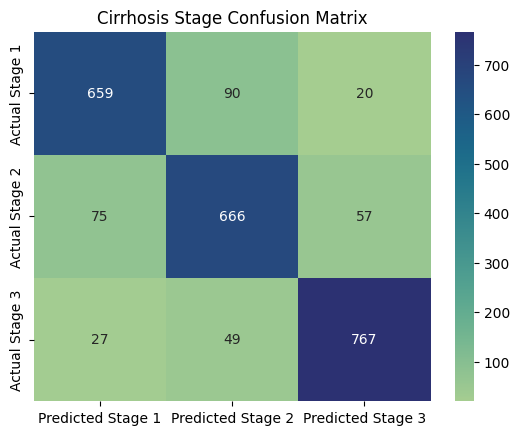

In [ ]:
# Evaluate the random forest model
# Calculate the confusion matrix
c_matrix = confusion_matrix(y_test, rf_predictions)
c_matrix_df = pd.DataFrame(
    c_matrix, index=["Actual Stage 1", "Actual Stage 2", "Actual Stage 3"], columns=["Predicted Stage 1", "Predicted Stage 2", "Predicted Stage 3"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

#Display classification report
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

# Display confusion matrix
# seaborn heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(c_matrix_df, cmap="crest", annot=True, fmt='g')
plt.title("Cirrhosis Stage Confusion Matrix")
plt.show()


<Axes: title={'center': 'Feature Importances'}, ylabel='Features'>

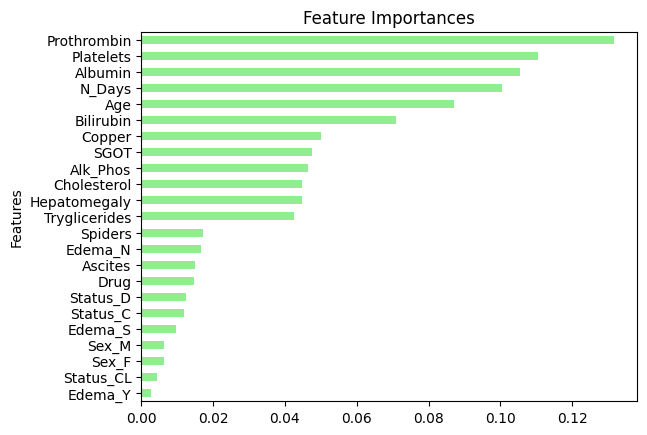

In [ ]:
#evaluate importance of the input features
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns),reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', ylabel= 'Features', legend=False)

In [ ]:
importances_df.head()

,Feature Importances
1,
Prothrombin,0.131547
Platelets,0.110504
Albumin,0.105550
N_Days,0.100413
Age,0.087133
